In [30]:
#IMPORTS

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math 


#### 1 - Leia o arquivo lemonades.csv usando pandas

In [4]:
df = pd.read_csv('Lemonades.csv',sep=';')
df.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,07/01/2016,Park,97,67,70,90.0,0.25
1,07/02/2016,Park,98,67,72,90.0,0.25
2,07/03/2016,Park,110,77,71,104.0,0.25
3,07/04/2016,Beach,134,99,76,98.0,0.25
4,07/05/2016,Beach,159,118,78,135.0,0.25


#### 2 - retorne as informações sobre as colunas e as principais estatísticas sobre o dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
Date           31 non-null object
Location       32 non-null object
Lemon          32 non-null int64
Orange         32 non-null int64
Temperature    32 non-null int64
Leaflets       31 non-null float64
Price          32 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.8+ KB


In [6]:
df.describe()

,Lemon,Orange,Temperature,Leaflets,Price
count,32.000000,32.000000,32.000000,31.000000,32.000000
mean,116.156250,80.000000,78.968750,108.548387,0.354687
std,25.823357,21.863211,4.067847,20.117718,0.113137
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.750000,77.000000,90.000000,0.250000
50%,113.500000,76.500000,80.500000,108.000000,0.350000
75%,131.750000,95.000000,82.000000,124.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


#### 3. Realize a limpeza do dataset:

#### a. verifique se existe valores nulos

In [7]:
df[df.isnull().any(axis=1)]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
8,NaN,Beach,123,86,82,113.0,0.25
20,7/20/2016,Park,71,42,70,NaN,0.50


In [8]:
df['Leaflets'] = df['Leaflets'].fillna(df['Leaflets'].mean())

#### b. verifique e remova, se existir, linhas duplicadas

In [9]:
df[df.duplicated()]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
6,07/06/2016,Beach,103,69,82,90.0,0.25


In [10]:
df = df.drop_duplicates( keep='last')

#### 4 Adicione uma coluna chamada "Sales" que contém o total de
#### vendas de limão e laranja

In [11]:
df['Sales'] = df['Lemon'] + df['Orange']

#### 5. Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço)

In [12]:
df['Revenue'] = df['Sales'] * df['Price']

#### 6. Escreva uma função que retorne o lucro total

In [13]:
def fn_retorna_lucro():
    return ('o lucro total é de:' , df['Revenue'].sum())
    

In [14]:
fn_retorna_lucro()

('o lucro total é de:', 2138.0)

#### 7. Escreva uma função que receba dois parâmetros, dataset e
####    temp(int). Se temp for 1, ele retorna a máxima temperatura
####    observada no conjunto de dados; se 0, retorna a média do período
####    observado; se -1, retorna a temperatura mínima

In [15]:
def fn_retorna_temperatura(df_dados, fl_temperatura):
    if fl_temperatura == -1:
        resultado = df_dados['Temperature'].min()
    elif fl_temperatura == 0:
        resultado = df_dados['Temperature'].mean()
    elif fl_temperatura == 1:
        resultado = df_dados['Temperature'].max()
    
    return(resultado)
    

In [16]:
print('Temperatura Minima é de: ', fn_retorna_temperatura(df,-1), \
      'f e a média é de: ', fn_retorna_temperatura(df,0),\
     'f e a Maxima é de: ', fn_retorna_temperatura(df,1))

Temperatura Minima é de:  70 f e a média é de:  78.87096774193549 f e a Maxima é de:  84


#### 8. Escreva uma função que receba dois parâmetros (dataset,localização) e retorne o dataset com o preço do limão e laranja
#### ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach'

In [17]:
def fn_retorna_preco_localizacao(df_dados, nm_locale):
    
    if nm_locale=='Park':
        df_dados['Price'] *= 1.15
    elif nm_locale=='Beach':
        df_dados['Price'] *= 1.10
        
    return(df_dados)
    

In [18]:
fn_retorna_preco_localizacao(df,'Park')

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,07/01/2016,Park,97,67,70,90.000000,0.2875,164,41.00
1,07/02/2016,Park,98,67,72,90.000000,0.2875,165,41.25
2,07/03/2016,Park,110,77,71,104.000000,0.2875,187,46.75
3,07/04/2016,Beach,134,99,76,98.000000,0.2875,233,58.25
4,07/05/2016,Beach,159,118,78,135.000000,0.2875,277,69.25
6,07/06/2016,Beach,103,69,82,90.000000,0.2875,172,43.00
7,07/07/2016,Beach,143,101,81,135.000000,0.2875,244,61.00
8,NaN,Beach,123,86,82,113.000000,0.2875,209,52.25
9,07/09/2016,Beach,134,95,80,126.000000,0.2875,229,57.25
10,07/10/2016,Beach,140,98,82,131.000000,0.2875,238,59.50


#### 9. Escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de
#### temperatura. O dataset retornado precisa estar ordenado de acordo com rank (descendente)

In [19]:
def fn_rank_temperatura(df_dados):    
    df_dados['Rank'] = df_dados['Temperature'].rank(ascending=0)     
    df_dados.sort_values('Rank' ,  ascending=False, inplace=True)
    return (df_dados)
    

In [20]:
fn_rank_temperatura(df)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue,Rank
0,07/01/2016,Park,97,67,70,90.000000,0.2875,164,41.00,30.5
20,7/20/2016,Park,71,42,70,108.548387,0.5750,113,56.50,30.5
2,07/03/2016,Park,110,77,71,104.000000,0.2875,187,46.75,29.0
1,07/02/2016,Park,98,67,72,90.000000,0.2875,165,41.25,28.0
16,7/16/2016,Beach,81,50,74,90.000000,0.5750,131,65.50,27.0
15,7/15/2016,Beach,98,62,75,108.000000,0.5750,160,80.00,26.0
3,07/04/2016,Beach,134,99,76,98.000000,0.2875,233,58.25,25.0
13,7/13/2016,Beach,109,75,77,99.000000,0.2875,184,46.00,23.0
21,7/21/2016,Park,83,50,77,90.000000,0.5750,133,66.50,23.0
17,7/17/2016,Beach,115,76,77,126.000000,0.5750,191,95.50,23.0


#### 10. Imprima um gráfico de linha que retorne o lucro ao longo do tempo

/home/eduardo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


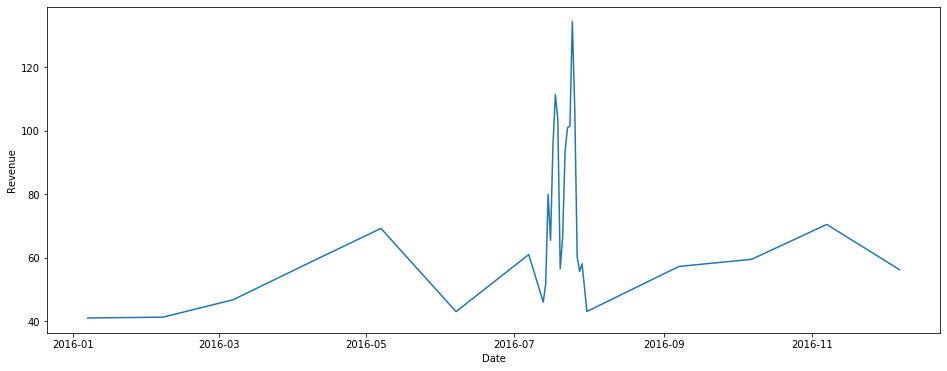

In [21]:
df['Date'] =pd.to_datetime(df['Date'], dayfirst=True)

plt.figure(figsize=(16, 6))
sns.lineplot(df['Date'],df['Revenue'], err_style=None)

#### 11. Crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados? (Use a correlação de Pearson e explique o significado do
valor obtido por ela)

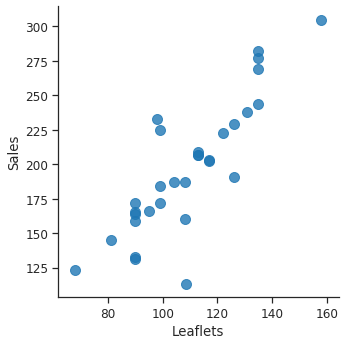

In [22]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('Leaflets', 
           'Sales', 
           data=df, 
           fit_reg=False,                       
           scatter_kws={"marker": "D","s": 100}) 


#### 12. Crie um histograma com 10 bins que mostre o lucro (revenue).

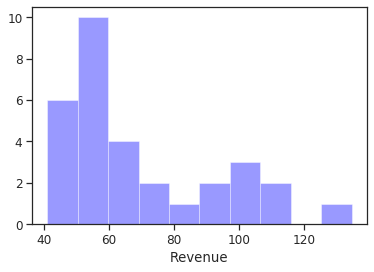

In [23]:
sns.distplot(df['Revenue'], kde=False, color='blue', bins=10)

#### 13. Crie um gráfico de linha que mostre o lucro por tipo de fruta ao longo do tempo.

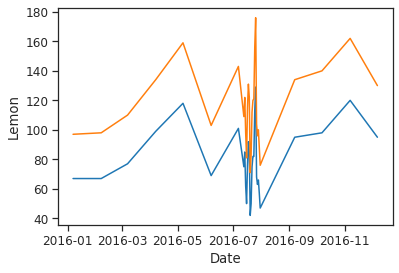

In [24]:

sns.lineplot(df['Date'],df['Orange'], err_style=None)
sns.lineplot(df['Date'],df['Lemon'], err_style=None)




#### 14. Ajuste uma Regressão Linear aos dados para predizer vendas usando cada uma das features abaixo:
##### a. Temperature
##### b. Leaflets
##### c. Price

##### d. Retorne um gráfico com a reta ajustada aos dados para cada feature e diga se ela é uma variável boa ou não para predizer vendas. 

In [39]:
feature_col = ['Temperature']
meta_col = ['Sales']

X = df[feature_col].values
y = df[meta_col].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) # flatten arrays
y_pred = lr_model.predict(X_test)
mean_squared_error(y_test,y_pred)

1819.4473760212618

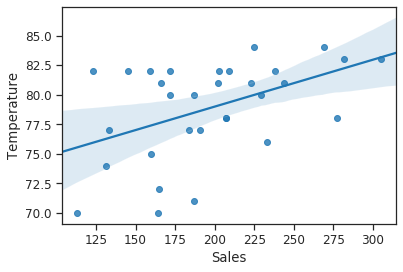

In [40]:
sns.regplot(x="Sales", y="Temperature", data=df)

In [37]:
feature_col = ['Leaflets']
meta_col = ['Sales']

X = df[feature_col].values
y = df[meta_col].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) # flatten arrays
y_pred = lr_model.predict(X_test)
mean_squared_error(y_test,y_pred)

308.14292540797123

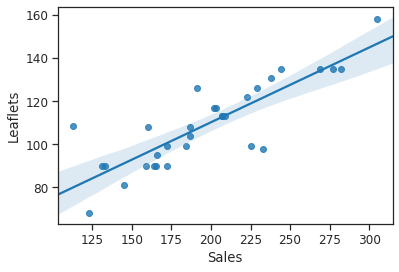

In [41]:
sns.regplot(x="Sales", y="Leaflets", data=df)

In [38]:
feature_col = ['Price']
meta_col = ['Sales']

X = df[feature_col].values
y = df[meta_col].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) # flatten arrays
y_pred = lr_model.predict(X_test)
mean_squared_error(y_test,y_pred)

4581.012519623235

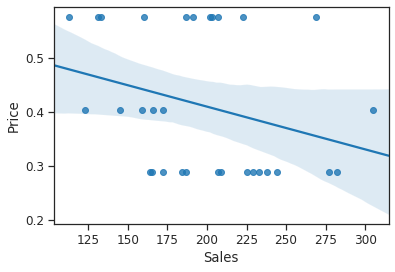

In [42]:
sns.regplot(x="Sales", y="Price", data=df)

#### a Melhor variável entre as 3 do exercicio é a Leaflets

#### 15. Ajuste uma Regressão Linear aos dados para predizer vendas usando as três features juntas. Comente o resultado obtido.

In [43]:
feature_col = ['Temperature','Leaflets','Price']
meta_col = ['Sales']

X = df[feature_col].values
y = df[meta_col].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel()) # flatten arrays
y_pred = lr_model.predict(X_test)
mean_squared_error(y_test,y_pred)

519.3431757068871